<h1 align=center>Linear Regression On Boston Data Set </h1>

1. House Prize Predication Data Set
2. Collect The Data
3. Prepare the Data
4. Select the Data
5. Descriptive Stast

##### Load The Packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

##### Load The Data From Scikit-Learn

In [2]:
Data = load_boston()
print(Data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(Data.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df.columns = Data.feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


##### Exploratory Data Analysis

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

df.shape

In [10]:
df['PRICE'] = Data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [12]:
X = df.drop('PRICE',axis = 1)
X.shape

(506, 13)

In [13]:
Y = df['PRICE']
Y.shape

(506,)

#### Train and Testing the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
x_train.shape

(404, 13)

In [17]:
y_train.shape

(404,)

In [18]:
x_test.shape

(102, 13)

In [19]:
y_test.shape

(102,)

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
lm.coef_

array([-9.13842488e-02,  4.40272874e-02,  3.08398725e-02,  3.34616950e+00,
       -1.76146675e+01,  4.22760526e+00, -7.37193601e-03, -1.50676201e+00,
        3.47257837e-01, -1.40782325e-02, -1.00317834e+00,  1.04621213e-02,
       -4.84847016e-01])

In [23]:
lm.intercept_

34.680042892584126

In [24]:
y_pred = lm.predict(x_test)
y_pred.shape

(102,)

In [25]:
y_pred

array([17.86871095, 15.82826951, 15.99539076, 22.99589289, 39.89978962,
       33.02886956, 12.35785703, 15.5622698 , 32.4520404 , 20.13006619,
       21.54379582, 16.79242103, 21.19320366, 15.01035889, 29.2040426 ,
       13.52068081, 27.58214393, 24.54826128, 33.21363104, 18.76776478,
       36.46391349, 25.09856914, 23.34050418, 19.99984478, 22.60158348,
       18.17485424, 28.52126829, 25.39591717, 28.43780572, 21.99857992,
       30.25079708, 20.93129128, 16.88825543, 24.31780936, 25.39880705,
       25.27675508, 18.06883371, 20.32970005, 13.36070123, 28.66484   ,
       19.11679419, 18.43123532, 21.81654909, 24.85364219, 13.10306561,
       10.21816982, 19.90102526, 39.09528654, 36.22592689, 31.5660043 ,
       22.60810121, 18.18100588, 19.75637997, 32.35823969, 20.50929583,
       14.95228224, 18.99651212, 36.84620873, 14.74264638, 38.65027533,
       19.85981683, 33.8517604 , 20.20374016, 32.11688569, 25.68947545,
       28.28308034, 18.93943112, 20.722806  , 26.36217825, 25.24

Text(0, 0.5, 'Predicted Prices: $\\hat{Y}_i$')

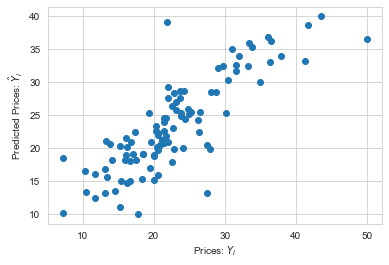

In [26]:
sns.set_style("whitegrid")
plt.scatter(y_test,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")


### Error Metrics and accuracy of model

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [28]:
mean_absolute_error(y_test,y_pred)

3.1886364284263515

In [29]:
mean_squared_error(y_test,y_pred)

19.565464560365477

In [30]:
r2_score(y_test,y_pred)

0.6806252735983376

In [31]:
lm.score(x_train,y_train)

0.7483540133692262

In [32]:
lm.score(x_test,y_test)

0.6806252735983376

In [33]:
lm.score(x_test,y_pred)

1.0

In [47]:
lm_predication= lm.predict(x_test)

In [48]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV

### Ridge and RidgeCv

In [49]:
ridge = Ridge(alpha=0.1).fit(x_train,y_train)

In [50]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [51]:
ridge_predication = ridge.predict(x_test)

In [42]:
ridge_cv = RidgeCV(alphas=np.array([ 0.1, 0.001, 1. , 10. ])).fit(x_train,y_train)

In [46]:
ridge_cv_predication = ridge_cv.predict(x_test)

### Lasso and LassoCv

In [59]:
lasso = Lasso(alpha=0.1).fit(x_train,y_train)
lasso_predication  = lasso.predict(x_test)

In [64]:
lasso_cv = LassoCV(alphas=np.array([0.1,0.01,0.001,1.0,10.])).fit(x_train,y_train)
lasso_cv_predication = lasso_cv.predict(x_test)

### ElasticNet,ElasticNetCV

In [68]:
Enet = ElasticNet(alpha=0.1).fit(x_train,y_train)
Enet_Predication = Enet.predict(x_test)

In [73]:
Enet_cv = ElasticNetCV(alphas=[0.1,0.01,10.]).fit(x_train,y_train)
Enet_cv_predication = Enet_cv.predict(x_test)

In [74]:
All_Prediacation = pd.DataFrame({"actual_Data":y_test,
                                 'Linear':lm_predication,
                                  "ridge":ridge_predication,
                                  "ridge_cv":ridge_cv_predication,
                                 "Lasso":lasso_predication,
                                 "Lasso_cv":lasso_cv_predication,
                                 "ElasticNet":Enet_Predication,
                                 "ElasticNetCV":Enet_cv_predication
                                })
All_Prediacation

,actual_Data,Linear,ridge,ridge_cv,Lasso,Lasso_cv,ElasticNet,ElasticNetCV
207,22.5,17.868711,17.808970,17.868021,17.308979,17.855220,17.385635,17.389013
355,20.6,15.828270,15.986728,15.829965,18.149304,15.870919,18.303603,17.203680
434,11.7,15.995391,16.045934,15.996036,16.788914,16.009366,16.915672,16.451066
358,22.7,22.995893,23.175612,22.997917,24.117658,23.030866,23.847159,24.347160
268,43.5,39.899790,39.950889,39.900298,40.501766,39.912440,40.544640,40.348700
...,...,...,...,...,...,...,...,...
75,21.4,23.876643,23.764672,23.875422,22.536908,23.848911,22.472876,22.928621
59,19.6,20.913596,20.944773,20.913892,21.633505,20.924092,21.921831,21.231170
148,17.8,9.976672,10.219855,9.979304,13.248914,10.039035,13.445941,12.085143
306,33.4,35.910638,35.885293,35.910307,35.539982,35.904213,35.469963,35.696606


In [75]:
np.mean(All_Prediacation)

actual_Data     22.783333
Linear          23.369160
ridge           23.381521
ridge_cv        23.369289
Lasso           23.592339
Lasso_cv        23.372801
ElasticNet      23.649120
ElasticNetCV    23.486617
dtype: float64

In [80]:
COEFF = pd.DataFrame({'Linear_Coeff':lm.coef_,
                      "ridge":ridge.coef_,
                      "ridge_cv":ridge_cv.coef_,
                      "lasso":lasso.coef_,
                      "Lasso_cv":lasso_cv.coef_,
                      "ElasticNet":Enet.coef_,
                      "ElasticNetCV":Enet_cv.coef_
                     })

In [82]:
from sklearn.model_selection import cross_val_score

In [89]:
models = [lm,ridge,ridge_cv,lasso,lasso_cv,Enet,Enet_cv]
for i in models:
    cv = cross_val_score(i, x_train,y_train,cv =20)
    print("Model name",i)
    print("Model Max",np.max(cv))
    print("Model Aaverage",np.mean(cv))
    print("Model Min",np.min(cv))
    print("*"*30)

Model name LinearRegression()
Model Max 0.87482316712027
Model Aaverage 0.6949044624747763
Model Min 0.29056786333226214
******************************
Model name Ridge(alpha=0.1)
Model Max 0.8754485576530999
Model Aaverage 0.695102819047215
Model Min 0.28723172228797567
******************************
Model name RidgeCV(alphas=array([1.e-01, 1.e-03, 1.e+00, 1.e+01]))
Model Max 0.874830438747848
Model Aaverage 0.6941593919743136
Model Min 0.2872316892727027
******************************
Model name Lasso(alpha=0.1)
Model Max 0.8659995025367601
Model Aaverage 0.6834322846867031
Model Min 0.24260011954001803
******************************
Model name LassoCV(alphas=array([1.e-01, 1.e-02, 1.e-03, 1.e+00, 1.e+01]))
Model Max 0.8749098821827868
Model Aaverage 0.6949387284709536
Model Min 0.2896748427221342
******************************
Model name ElasticNet(alpha=0.1)
Model Max 0.8588118162693006
Model Aaverage 0.6834308511501934
Model Min 0.28950462936766463
******************************
M